# K-Nearest Neighbors Classifier applied to Wheat seeds data

### source : UCI Machine Learning datasets : https://archive.ics.uci.edu/ml/datasets/seeds
### This project is a part of eDXs "Microsoft: DAT210x Programming with Python for Data Science" tutorial.


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
X = pd.read_csv('wheat.data') # Load the data set and take a peek
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [3]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
id             210 non-null int64
area           210 non-null float64
perimeter      210 non-null float64
compactness    207 non-null float64
length         210 non-null float64
width          209 non-null float64
asymmetry      210 non-null float64
groove         206 non-null float64
wheat_type     210 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ KB


In [4]:
X.isnull().values.any() # Checking if the dataset has missing values

True

In [5]:
X.isnull().values.sum()

8

In [6]:
X = X.fillna(X.mean()) # Replacing missing values with mean of that column. 

In [7]:
X.isnull().values.any() # Checking if the replacement worked. 

False

### I am going  to use a classification algorithm and therefore the class label needs to be dropped.

In [8]:
y = X['wheat_type'].copy() # copy class type/label

In [9]:
type(y)

pandas.core.series.Series

In [10]:
type(X)

pandas.core.frame.DataFrame

In [24]:
X = X.iloc[:, 1:-1] # Just removed the id column because it's not going to help the analysis
type(X)

pandas.core.frame.DataFrame

In [12]:
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [13]:
y.unique() # Checking how many unique labels are there.

array(['kama', 'canadian', 'rosa'], dtype=object)

In [14]:
y.value_counts() # Frequencies of each class labels

canadian    76
rosa        68
kama        66
Name: wheat_type, dtype: int64

### Most of the algorithms does not work with text data (Objects), therefore we need to encode them with numeric values. I am using LabelEncoder from sklearn preprocessing. Also, see onehotencoder and labelbinarizer.

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [17]:
type(y)

numpy.ndarray

### Split the dataset into two categories - training and testing (standard procedure) using sklearn's train_test_split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # 70% data as training and the rest is to test the model

((147, 7), (63, 7), (147L,), (63L,))

### Normalize the dataset using standardscaler (there are other normalizer and it's a good idea to play with them to see the difference (if any)

In [19]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train) # we first fit the training data
X_train = std_scale.transform(X_train) # then we apply the scaler to the training data
X_test = std_scale.transform(X_test) # then apply the scaler to the test data

## PCA (Principle Component Analysis)
### This is a dimensionality reduction algorithm and indicates which features are important in an n-dimensional space reduced from an m-dimensional feature space. 

In [25]:
# PCA analysis (dimensionality reduction) of training data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
X_train.shape, X_train_reduced.shape, X_test_reduced.shape # Note that 7 dimensional feature space is reduced to 2

((147L, 7L), (147L, 2L), (63L, 2L))

### After preprocessing and dimensionality reduction, we are ready to fit the model to our dataset.

In [21]:
from sklearn.neighbors import KNeighborsClassifier # importing
knn = KNeighborsClassifier(n_neighbors=9) # applying the model
knn.fit(X_train_reduced, y_train) # fitting to the training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [22]:
knn.score(X_test_reduced, y_test) # This is the accuracy score of the model

0.88888888888888884

### Plotting the data and decision boundaries

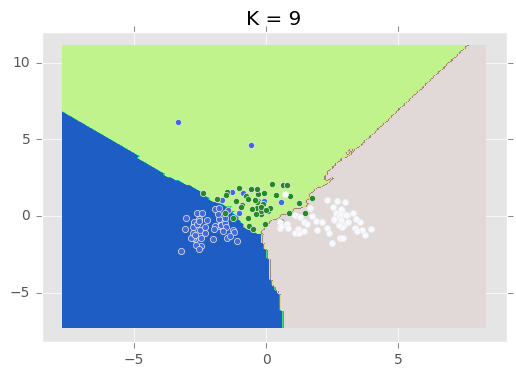

In [27]:

def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.1
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=1.0)

        p = model.get_params()
        plt.axis('tight')
        plt.title('K = ' + str(p['n_neighbors']))
plotDecisionBoundary(knn, X_train_reduced, y_train)
plt.show()